# Donald J. Trump - A twitter analysis


### Hello! This is my course project for the course "Data Analysis with Python: Zero to Pandas " taught eloquently by Sir Aakash.

### I've chosen a data set called "Donald Trump tweets", which was recommended by my instructor. In this project my primary goal was to analyse the behavior of Donald Trump's Twitter account leading upto the 2016 US General Election. The following libraries have been used in this project: (1) Pandas (2) Matplotlib

### This course was an immense learning curve for me. I would like to thank my instructor for making me able to create this project.

In [84]:
project_name = "Donald J. Trump - A twitter analysis " 

In [85]:
!pip install jovian --upgrade -q

In [86]:
import jovian

In [87]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saadberry29/donald-j-trump-a-twitter-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis


'https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis'

## Data Preparation and Cleaning

In the intial stages of analysis, I performed some basic operations from calling Pandas/Matplotlib library to checking the type of file.

In [88]:
from urllib.request import urlretrieve

In [89]:
!pip install pandas 
import pandas as pd  
!pip install matplotlib 
import matplotlib 
import matplotlib.pyplot as plt
import re 
!pip install numpy
import numpy as np

# Equating a readable version of file to variable 'twt'

In [90]:
twt = pd.read_csv('trumptweets.csv') 

In [91]:
twt

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [92]:
type(twt) # checking type of 'twt'

pandas.core.frame.DataFrame

In [93]:
twt.info() # checking info of 'twt'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [94]:
twt.content # displaying tweets

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
41117    I have never seen the Republican Party as Stro...
41118    Now Mini Mike Bloomberg is critical of Jack Wi...
41119    I was thrilled to be back in the Great State o...
41120    “In the House, the President got less due proc...
41121    A great show! Check it out tonight at 9pm. @ F...
Name: content, Length: 41122, dtype: object

In [95]:
twt.shape # checking dimensions of csv file

(41122, 9)

## Creating new variable 'twtElection' which will hold the records from 01.01.16 -> 08.11.16

In [96]:

twtElection = twt.loc[(twt['date'] >= '2016-01-01') & (twt['date'] <= '2016-12-30' )]  
twtElection ## displaying twtElection

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
27172,682700657304989697,https://twitter.com/realDonaldTrump/status/682...,"Do you believe that The State Department, on N...",2016-01-01 00:11:35,2379,5904,NaN,NaN,NaN
27173,682703233492619264,https://twitter.com/realDonaldTrump/status/682...,I would like to wish everyone A HAPPY AND HEAL...,2016-01-01 00:21:49,5969,14936,NaN,NaN,NaN
27174,682723973449289728,https://twitter.com/realDonaldTrump/status/682...,"I will be on @ FoxNews live, with members of m...",2016-01-01 01:44:14,1776,5742,@,NaN,NaN
27175,682764544402440192,https://twitter.com/realDonaldTrump/status/682...,HAPPY NEW YEAR & THANK YOU! https://www.facebo...,2016-01-01 04:25:27,2887,7363,NaN,NaN,NaN
27176,682792967736848385,https://twitter.com/realDonaldTrump/status/682...,# HappyNewYearAmerica!pic.twitter.com/EeQb8PDrUe,2016-01-01 06:18:23,2882,7839,NaN,#,NaN
...,...,...,...,...,...,...,...,...,...
31113,814110460761018368,https://twitter.com/realDonaldTrump/status/814...,Doing my best to disregard the many inflammato...,2016-12-28 15:07:13,26563,102340,NaN,NaN,NaN
31114,814113616110751744,https://twitter.com/realDonaldTrump/status/814...,We cannot continue to let Israel be treated wi...,2016-12-28 15:19:46,25433,93467,NaN,NaN,NaN
31115,814114980983427073,https://twitter.com/realDonaldTrump/status/814...,not anymore. The beginning of the end was the ...,2016-12-28 15:25:11,29033,102879,NaN,NaN,NaN
31116,814231064847728640,https://twitter.com/realDonaldTrump/status/814...,'Economists say Trump delivered hope'http://ww...,2016-12-28 23:06:28,11674,44791,NaN,NaN,NaN


In [97]:
# convert Date to "datetime"
twtElection['date'] = pd.to_datetime(twtElection.date)
#twtElection['date']

C:\Users\xt\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# selecting only the most relavent columns for our analysis
selectedColumns = [
     # tweet information:
     'link',
     'content',
     'date',
    # tweet stats:
    'favorites',
    'retweets'
]
len(selectedColumns)

5

## Copying the selected columns to another variable, so that we can manipulate the data without affecting the main data

In [99]:

twtElection_copy = twtElection[selectedColumns].copy()
twtElection_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 27172 to 31117
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   link       3946 non-null   object        
 1   content    3946 non-null   object        
 2   date       3946 non-null   datetime64[ns]
 3   favorites  3946 non-null   int64         
 4   retweets   3946 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 185.0+ KB


In [100]:
twtElection_copy.isna().sum()

link         0
content      0
date         0
favorites    0
retweets     0
dtype: int64

In [101]:
!pip install missingno

In [102]:
twtElection_copy.isnull().sum()

link         0
content      0
date         0
favorites    0
retweets     0
dtype: int64

In [103]:
import missingno as msno

In [104]:
#Clearing null values
twtElection_copy = twtElection_copy.fillna(" ")


In [105]:
twtElection_copy.isnull().sum()

link         0
content      0
date         0
favorites    0
retweets     0
dtype: int64

In [106]:
# checking basic details about data; like mean,median, mode etc
twtElection_copy.describe()

,favorites,retweets
count,3946.000000,3946.000000
mean,19093.659149,6584.226305
std,23152.827310,8639.298786
min,1498.000000,488.000000
25%,7843.750000,2600.000000
50%,13567.000000,4682.000000
75%,22451.750000,8044.750000
max,564352.000000,295817.000000


In [107]:
# extratcting months from date column 
twtElection_copy['month'] = pd.DatetimeIndex(twtElection.date).month
print(twtElection_copy)

                                                    link  \
27172  https://twitter.com/realDonaldTrump/status/682...   
27173  https://twitter.com/realDonaldTrump/status/682...   
27174  https://twitter.com/realDonaldTrump/status/682...   
27175  https://twitter.com/realDonaldTrump/status/682...   
27176  https://twitter.com/realDonaldTrump/status/682...   
...                                                  ...   
31113  https://twitter.com/realDonaldTrump/status/814...   
31114  https://twitter.com/realDonaldTrump/status/814...   
31115  https://twitter.com/realDonaldTrump/status/814...   
31116  https://twitter.com/realDonaldTrump/status/814...   
31117  https://twitter.com/realDonaldTrump/status/814...   

                                                 content                date  \
27172  Do you believe that The State Department, on N... 2016-01-01 00:11:35   
27173  I would like to wish everyone A HAPPY AND HEAL... 2016-01-01 00:21:49   
27174  I will be on @ FoxNews live, wit

In [108]:
twtElection_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 27172 to 31117
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   link       3946 non-null   object        
 1   content    3946 non-null   object        
 2   date       3946 non-null   datetime64[ns]
 3   favorites  3946 non-null   int64         
 4   retweets   3946 non-null   int64         
 5   month      3946 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 215.8+ KB


## Exploratory Analysis and Visualization

### In this phase of analysis, i gradually begin to disect the information given and visualize some aspects of it.

#### For analysis, i have chosen the time frame of the US General Elections, from January 01, 2016 leading up to the election ( November 8, 2016).

#### I am going to analyse what Trump's main subjects of tweets were leading up to the election, and other notable trends, if any. 

In [109]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (25,10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [110]:
#grouping the amount of favorites & retweets by months
twtElection_monthly = twtElection_copy.groupby('month')[['content','favorites','retweets']].sum()
twtElection_monthly.info

<bound method DataFrame.info of        favorites  retweets
month                     
1        2431582    884103
2        3515352   1311732
3        5608250   1943352
4        3254424   1126360
5        4576271   1570995
6        5010794   1799724
7        8986200   2974188
8        5851707   2039440
9        6086553   2176221
10      11234094   4853499
11      11415714   3479501
12       7372638   1822242>

In [111]:
twtElection_monthly

,favorites,retweets
month,,
1,2431582,884103
2,3515352,1311732
3,5608250,1943352
4,3254424,1126360
5,4576271,1570995
6,5010794,1799724
7,8986200,2974188
8,5851707,2039440
9,6086553,2176221


# Frequency of retweets in the months approaching the Election:

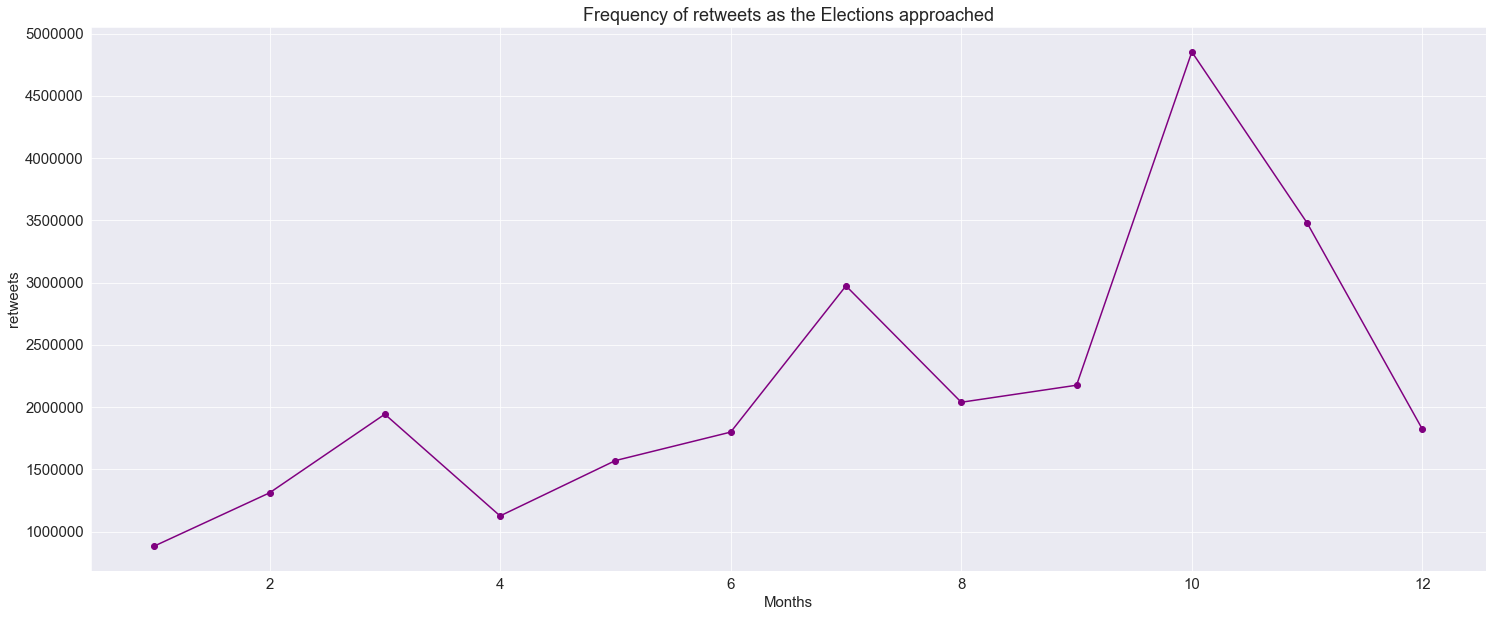

In [112]:

#plt.figure(10,5)
#plt.xlabel('Months')
#plt.ylabel('Number of tweets')
#m = twtElection['month']
#plt.hist(twtElection.months,twtElection.favorites)
#plt.hist((twtElection.date ) ,twtElection.retweets)
plt.xlabel('Months')
plt.ylabel('retweets')
plt.title("  Frequency of retweets as the Elections approached  ");
#plt.hist(twtElection.date, twtElection.retweets,bins = 10,  color='purple');
plt.plot(twtElection_monthly.index,twtElection_monthly.retweets ,color='purple',marker='o')

# Frequency of favorite tweets in the months approaching the Election:

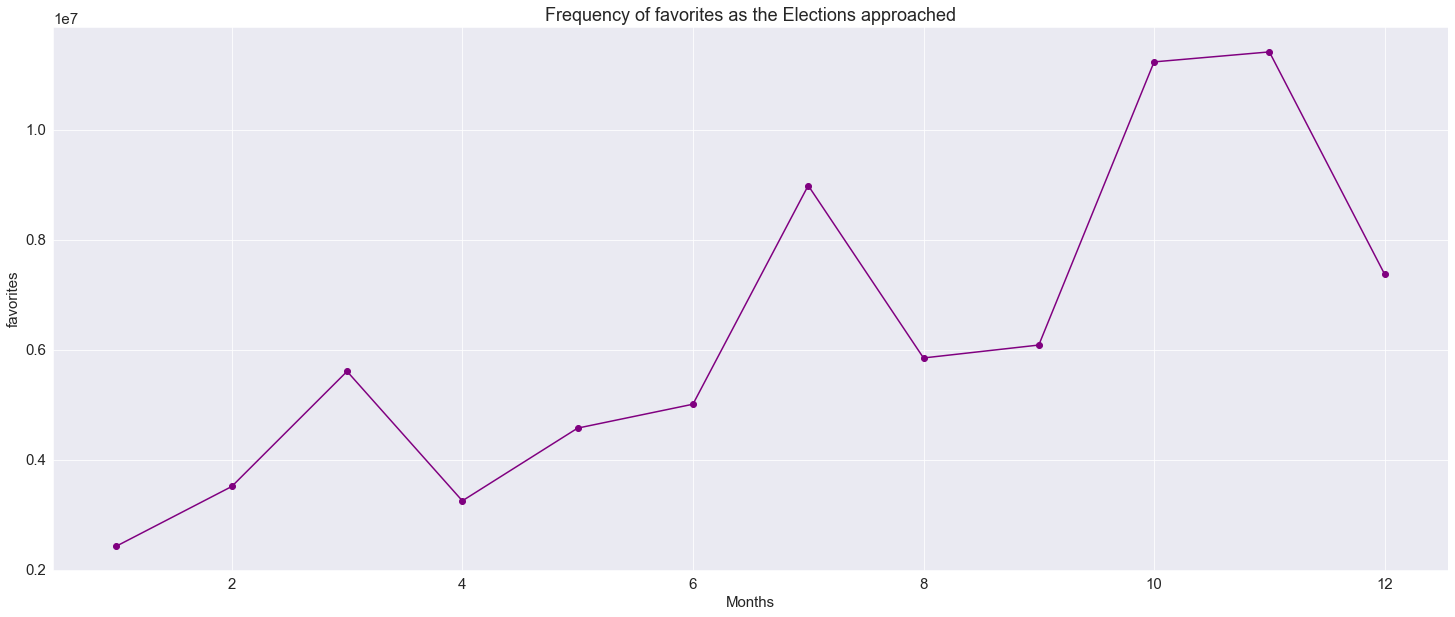

In [113]:

plt.xlabel('Months')
plt.ylabel('favorites')
plt.title("  Frequency of favorites as the Elections approached  ")
#plt.hist(twtElection.date, twtElection.favorites,bins = 10,  color='purple');
plt.plot(twtElection_monthly.index,twtElection_monthly.favorites ,color='purple',marker='o')

# Finding frequency of Trumps tweets on a monthly basis:

In [114]:
numElectionTwts = twtElection.content.nunique()
#checking number of tweets in a single month
numElectionTwts_monthly = twtElection_copy.groupby('month')[['content']].nunique()
#displaying total number of tweets tweeted per month:
numElectionTwts_monthly

,content
month,
1,481
2,470
3,413
4,274
5,340
6,293
7,354
8,268
9,271


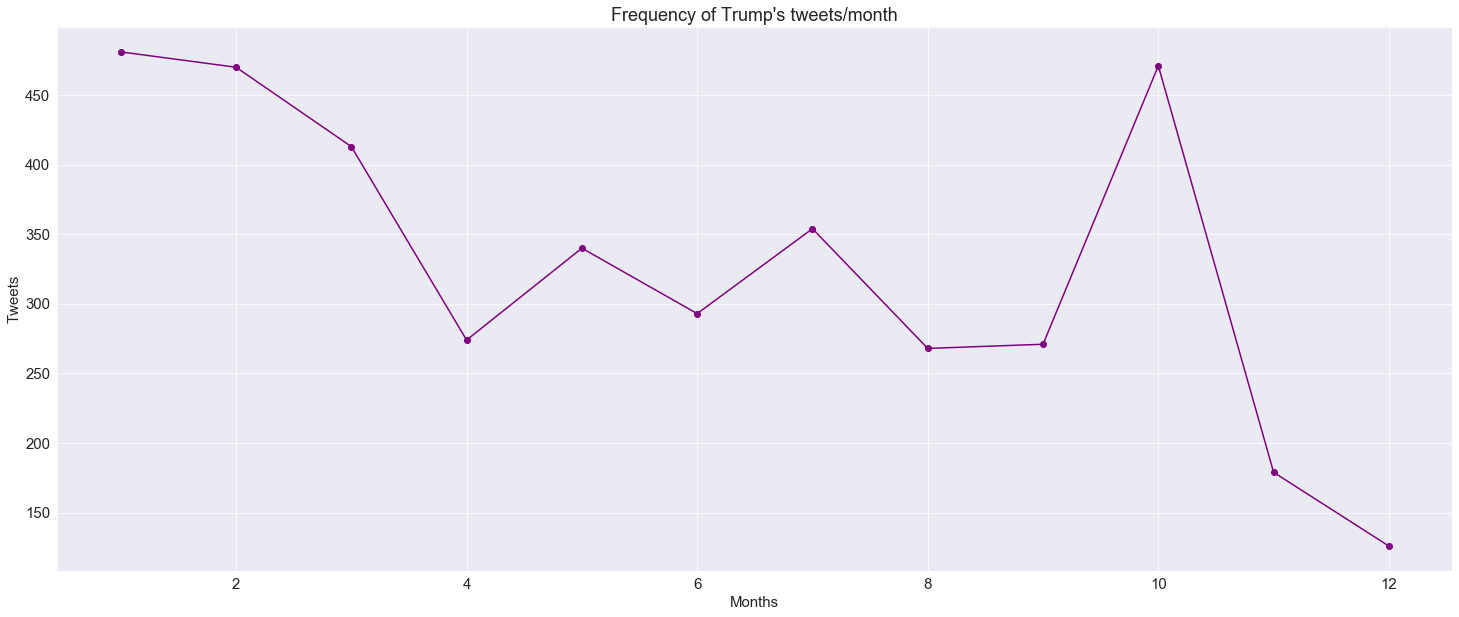

In [115]:
#graphical representation of Trumps tweets on a monthly basis:
plt.xlabel('Months')
plt.ylabel('Tweets')
plt.title("Frequency of Trump's tweets/month")
plt.plot(numElectionTwts_monthly.index,numElectionTwts_monthly,color = 'purple',marker='o')

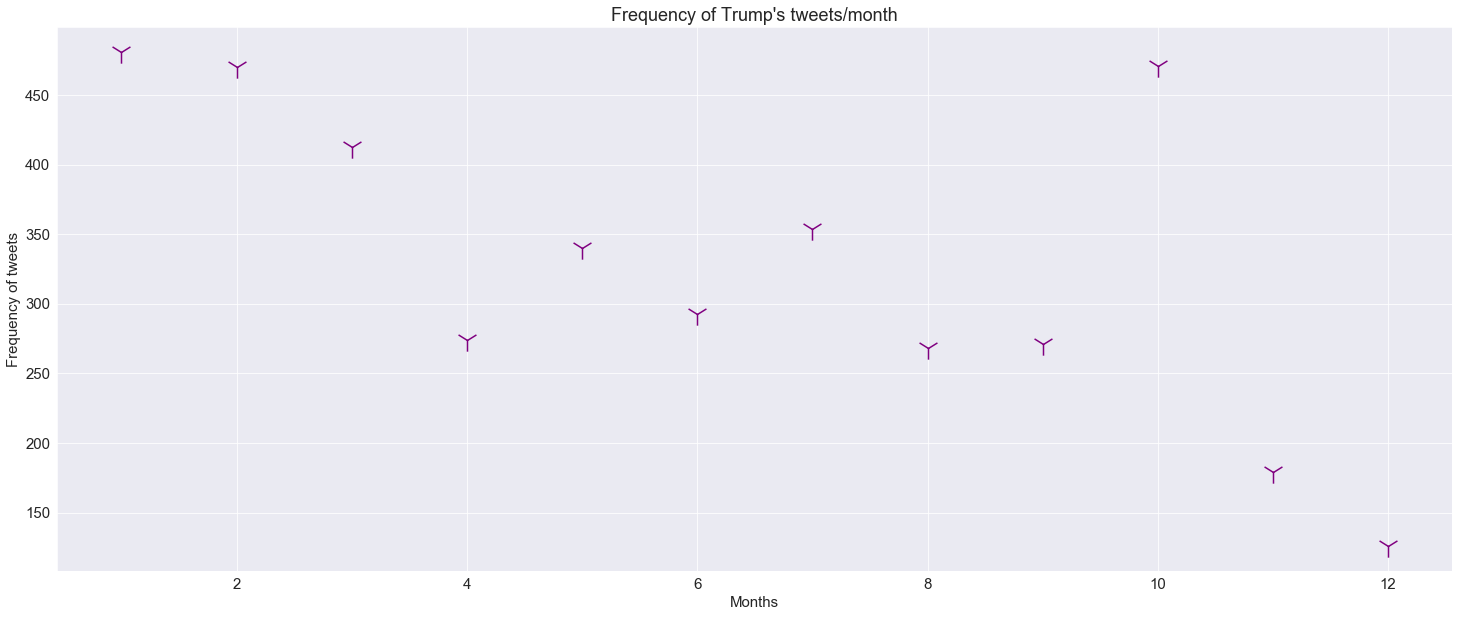

In [116]:
plt.title("Frequency of Trump's tweets/month")
plt.xlabel("Months")
plt.ylabel("Frequency of tweets")

plt.scatter(twtElection_monthly.index,numElectionTwts_monthly, color="purple",marker="1", s=500)

In [117]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saadberry29/donald-j-trump-a-twitter-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis


'https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis'

## Asking and Answering Questions

### In this phase of analysis i ask some statistical questions and try to answer them.

### ( Q1 ) - How many tweets did Trump tweet leading up to the Election ?

In [118]:
twtElection_copy.content.nunique()
print("Trump tweeted " + str(twtElection_copy.content.nunique()) + " times in the year 2016")

Trump tweeted 3938 times in the year 2016


### ( Q2 ) -Which tweets had more than 1000 favorites? 

In [119]:
favTwt = twtElection.favorites > 1000 
twtElection[favTwt].info

<bound method DataFrame.info of                        id                                               link  \
27172  682700657304989697  https://twitter.com/realDonaldTrump/status/682...   
27173  682703233492619264  https://twitter.com/realDonaldTrump/status/682...   
27174  682723973449289728  https://twitter.com/realDonaldTrump/status/682...   
27175  682764544402440192  https://twitter.com/realDonaldTrump/status/682...   
27176  682792967736848385  https://twitter.com/realDonaldTrump/status/682...   
...                   ...                                                ...   
31113  814110460761018368  https://twitter.com/realDonaldTrump/status/814...   
31114  814113616110751744  https://twitter.com/realDonaldTrump/status/814...   
31115  814114980983427073  https://twitter.com/realDonaldTrump/status/814...   
31116  814231064847728640  https://twitter.com/realDonaldTrump/status/814...   
31117  814484710025994241  https://twitter.com/realDonaldTrump/status/814...   

       

### ( Q3 ) - How many tweets had more than 1000 retweets? 

In [120]:
reTweet = twtElection.retweets > 1000
twtElection[reTweet].info


<bound method DataFrame.info of                        id                                               link  \
27172  682700657304989697  https://twitter.com/realDonaldTrump/status/682...   
27173  682703233492619264  https://twitter.com/realDonaldTrump/status/682...   
27174  682723973449289728  https://twitter.com/realDonaldTrump/status/682...   
27175  682764544402440192  https://twitter.com/realDonaldTrump/status/682...   
27176  682792967736848385  https://twitter.com/realDonaldTrump/status/682...   
...                   ...                                                ...   
31113  814110460761018368  https://twitter.com/realDonaldTrump/status/814...   
31114  814113616110751744  https://twitter.com/realDonaldTrump/status/814...   
31115  814114980983427073  https://twitter.com/realDonaldTrump/status/814...   
31116  814231064847728640  https://twitter.com/realDonaldTrump/status/814...   
31117  814484710025994241  https://twitter.com/realDonaldTrump/status/814...   

       

### ( Q4 ) - What is the ratio of favorites to retweets?

In [121]:
ratio = ( twtElection.favorites.sum() ) / ( twtElection.retweets.sum() )
ratio

2.8999093080473046

###  ( Q5 ) - Which tweets which had favorites and retweets > 1000 ?

In [122]:
viralTweet = ( twtElection.favorites > 1000 ) & (twtElection.retweets > 1000)
twtElection[viralTweet]

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
27172,682700657304989697,https://twitter.com/realDonaldTrump/status/682...,"Do you believe that The State Department, on N...",2016-01-01 00:11:35,2379,5904,NaN,NaN,NaN
27173,682703233492619264,https://twitter.com/realDonaldTrump/status/682...,I would like to wish everyone A HAPPY AND HEAL...,2016-01-01 00:21:49,5969,14936,NaN,NaN,NaN
27174,682723973449289728,https://twitter.com/realDonaldTrump/status/682...,"I will be on @ FoxNews live, with members of m...",2016-01-01 01:44:14,1776,5742,@,NaN,NaN
27175,682764544402440192,https://twitter.com/realDonaldTrump/status/682...,HAPPY NEW YEAR & THANK YOU! https://www.facebo...,2016-01-01 04:25:27,2887,7363,NaN,NaN,NaN
27176,682792967736848385,https://twitter.com/realDonaldTrump/status/682...,# HappyNewYearAmerica!pic.twitter.com/EeQb8PDrUe,2016-01-01 06:18:23,2882,7839,NaN,#,NaN
...,...,...,...,...,...,...,...,...,...
31113,814110460761018368,https://twitter.com/realDonaldTrump/status/814...,Doing my best to disregard the many inflammato...,2016-12-28 15:07:13,26563,102340,NaN,NaN,NaN
31114,814113616110751744,https://twitter.com/realDonaldTrump/status/814...,We cannot continue to let Israel be treated wi...,2016-12-28 15:19:46,25433,93467,NaN,NaN,NaN
31115,814114980983427073,https://twitter.com/realDonaldTrump/status/814...,not anymore. The beginning of the end was the ...,2016-12-28 15:25:11,29033,102879,NaN,NaN,NaN
31116,814231064847728640,https://twitter.com/realDonaldTrump/status/814...,'Economists say Trump delivered hope'http://ww...,2016-12-28 23:06:28,11674,44791,NaN,NaN,NaN


In [123]:
import jovian

In [124]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saadberry29/donald-j-trump-a-twitter-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis


'https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis'

## Inferences and Conclusion

### In this section i  wrap up everything that I have observed and come upto a reasonable conclusion

## I noticed a trend that Donald Trump gradually started tweeting more as Election month approached, with October being the month he tweeted the most. (450+ tweets)

## November (Election month) was the month when Trump received the most favorites on his tweets

## After completing this project, i have realised how imperative social media is for politicians and their campaigns.

## A big chunk of their campaigns are done online, and the reception they recieve on social media is a good indicator of their popularity among the people.

In [125]:
import jovian

In [126]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saadberry29/donald-j-trump-a-twitter-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis


'https://jovian.ml/saadberry29/donald-j-trump-a-twitter-analysis'

## References and Future Work

### In this section i discuss my future plans related to data science

### In the future i intend on delving further into this dataset and analazying a handful of more topics which were important during Donald Trump's term.

### Furthermore, I look forward to working on more data sets in the future. The aspect of analysing, making reasonable conclusions and prediciting certain outcomes from a set of data in data science is something that truly makes me feel like a scientist!

In [127]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
